# Reading and Exploring the Dataset

This notebook demonstrates how to read and analyze the training dataset from CSV file. We'll explore various properties and characteristics of the data.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('default')  # Using default style instead
sns.set_style("whitegrid")  # Using basic seaborn grid style

In [2]:
# Read the training dataset
data_train = pd.read_csv('../data/alpaca_mbj_bandgap_train.csv')

# Display basic information about the dataset
print("Dataset Shape:", data_train.shape)
print("\nDataset Info:")
data_train.info()
print("\nFirst few rows of the dataset:")
data_train.head()

Dataset Shape: (5000, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instruction  5000 non-null   object 
 1   input        5000 non-null   object 
 2   response     5000 non-null   object 
 3   id           5000 non-null   float64
 4   image        5000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 195.4+ KB

First few rows of the dataset:


,instruction,input,response,id,image
0,Generate atomic structure description with lat...,The chemical formula is Te3SeO8. The mbj_band...,4.9 6.9 11.6\n77 78 69\nTe\n0.15 0.87 0.30\nTe...,0.0,"[[788.7705980909478, 870.91214990967, 822.1257..."
1,Generate atomic structure description with lat...,The chemical formula is InF3. The mbj_bandgap...,5.8 5.8 5.8\n53 53 53\nIn\n0.50 0.50 0.50\nIn\...,1.0,"[[179.0272030566336, 298.58086754861387, 445.4..."
2,Generate atomic structure description with lat...,The chemical formula is MgIn2Te4. The mbj_ban...,7.7 7.7 7.7\n131 131 70\nMg\n0.75 0.25 0.50\nI...,2.0,"[[0.5089580355505919, 0.6700741460760542, 0.90..."
3,Generate atomic structure description with lat...,The chemical formula is Li4Mn3FeB4O12. The mb...,5.2 5.9 8.9\n103 90 114\nLi\n0.58 0.32 0.96\nL...,3.0,"[[80.3384859297844, 73.66505892997732, 62.1020..."
4,Generate atomic structure description with lat...,The chemical formula is TePdSe. The mbj_bandg...,4.0 4.0 5.0\n90 90 120\nTe\n0.00 0.00 0.73\nPd...,4.0,"[[71.49908188830403, 134.99222115262734, 226.5..."


In [3]:
# Check for missing values
print("Missing Values in Each Column:")
data_train.isnull().sum()

# Check for duplicate entries
print("\nNumber of Duplicate Entries:", data_train.duplicated().sum())

Missing Values in Each Column:

Number of Duplicate Entries: 0


## Data Visualization

Let's create some visualizations to better understand the distribution of values in our dataset.

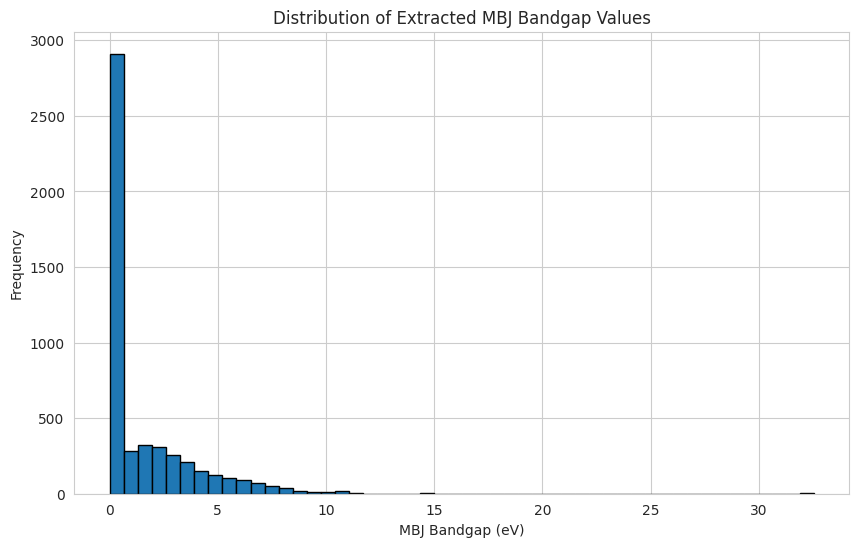


Number of successfully extracted bandgap values: 5000
Mean bandgap value: 1.49 eV
Median bandgap value: 0.00 eV
Min bandgap value: 0.00 eV
Max bandgap value: 32.56 eV


In [4]:
# Import the helper function
import sys
sys.path.append('../codes')  # Add the codes directory to Python path
from helper import extract_formula_bandgap

# Extract bandgap values from the text data
bandgap_values = []
formulas = []

for text in data_train['input']:  # Assuming 'input' column contains the text data
    formula, bandgap = extract_formula_bandgap(text)
    if bandgap is not None:
        bandgap_values.append(bandgap)
        formulas.append(formula)

# Convert to numpy array for plotting
bandgap_values = np.array(bandgap_values)

# Create histogram of extracted bandgap values
plt.figure(figsize=(10, 6))
plt.hist(bandgap_values, bins=50, edgecolor='black')
plt.title('Distribution of Extracted MBJ Bandgap Values')
plt.xlabel('MBJ Bandgap (eV)')
plt.ylabel('Frequency')
plt.show()

# Print some statistics about the extracted values
print(f"\nNumber of successfully extracted bandgap values: {len(bandgap_values)}")
print(f"Mean bandgap value: {np.mean(bandgap_values):.2f} eV")
print(f"Median bandgap value: {np.median(bandgap_values):.2f} eV")
print(f"Min bandgap value: {np.min(bandgap_values):.2f} eV")
print(f"Max bandgap value: {np.max(bandgap_values):.2f} eV")